Found 480 images belonging to 4 classes.
Found 120 images belonging to 4 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
activation_41 (Activation)   (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_42 (Activation)   (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 23, 23, 32)        0         
____________________________________________________________

30/30 [==============================] - 8s 273ms/step - loss: 0.7982 - acc: 0.6646 - val_loss: 0.8586 - val_acc: 0.6429
Epoch 45/70
30/30 [==============================] - 8s 272ms/step - loss: 0.8794 - acc: 0.6896 - val_loss: 0.8786 - val_acc: 0.6786
Epoch 46/70
30/30 [==============================] - 8s 273ms/step - loss: 0.8093 - acc: 0.6729 - val_loss: 0.8189 - val_acc: 0.6786
Epoch 47/70
30/30 [==============================] - 8s 271ms/step - loss: 0.7757 - acc: 0.6875 - val_loss: 0.8656 - val_acc: 0.6071
Epoch 48/70
30/30 [==============================] - 8s 274ms/step - loss: 0.8191 - acc: 0.6875 - val_loss: 0.9214 - val_acc: 0.6250
Epoch 49/70
30/30 [==============================] - 8s 275ms/step - loss: 0.7964 - acc: 0.7146 - val_loss: 0.8455 - val_acc: 0.6607
Epoch 50/70
30/30 [==============================] - 8s 273ms/step - loss: 0.7823 - acc: 0.6708 - val_loss: 0.7522 - val_acc: 0.6875
Epoch 51/70
30/30 [==============================] - 8s 272ms/step - loss: 0.7794

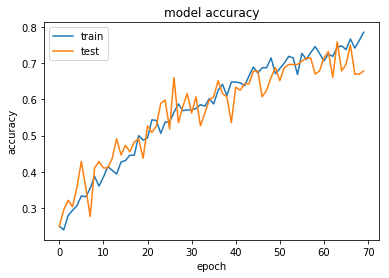

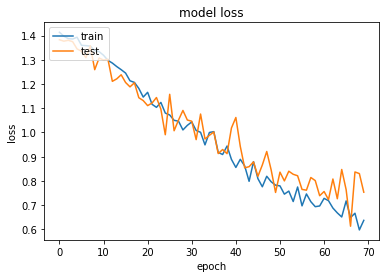

In [10]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, CSVLogger
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np 


img_width = 100
img_height = 100
batch_size_num = 16
epoch_num = 70
train_data_dir = 'data/train'
valid_data_dir = 'data/validation'

#datagen = ImageDataGenerator(rescale = 1./255)
datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale = 1./255)

train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size=(img_width,img_height),
                                              classes=['Glyffindor','Hufflpuff','Ravenclaw','Slytherin'],
                                              batch_size=batch_size_num)

validation_generator = datagen.flow_from_directory(directory=valid_data_dir,
                                                   target_size=(img_width,img_height),
                                                   classes=['Glyffindor','Hufflpuff','Ravenclaw','Slytherin'],
                                                   batch_size=batch_size_num)

model =Sequential()

model.add(Conv2D(32,(3,3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2)
training = model.fit_generator(generator=train_generator,
                               steps_per_epoch=480 // batch_size_num,
                               #epochs=50,
                               epochs=epoch_num,
                               validation_data=validation_generator,
                               validation_steps=120 // batch_size_num)
                               #callbacks=[es])

model.save('models/sorting_deep_hat.h5')

#正答率
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

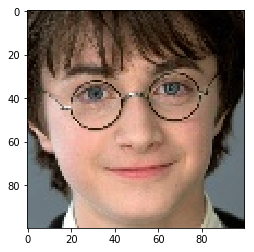

You are "Glyffindor" !!


In [6]:
%matplotlib inline

from keras.models import load_model
#from keras.preprocessing import image
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def sort(model, filepath):
    image=cv2.imread(filepath)

    b,g,r = cv2.split(image)
    x = cv2.merge([r,g,b])
    x = cv2.resize(x,(100, 100))
    x = np.array([x / 255.])

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    nameNumLabel=np.argmax(model.predict(x))
    if nameNumLabel== 0: 
        print('You are "Glyffindor" !!')
    elif nameNumLabel==1:
        print('You are "Hufflpuff" !!')
    elif nameNumLabel==2:
        print('You are "Ravenclaw" !!')
    elif nameNumLabel==3:
        print('You are "Slytherin" !!')


model = load_model('models/sorting_deep_hat.h5')

filepath = 'data/validation/Glyffindor/fb7b32ea72330a9c944c788eed9bcd05_0.jpg'
sort(model, filepath)

#filepath = 'data/validation/Hufflpuff/f1b642e619c2443d5d7458099468ccb1_0.jpg'
#sort(model, filepath)

#filepath = 'data/validation/Ravenclaw/f82cc187e480d1481b956eef6a8f0f85_0.jpg'
#sort(model, filepath)

#filepath = 'data/validation/Slytherin/cc270cb23f6556fb4e2d692221b2f617_0.jpg'
#sort(model, filepath)